# Cropland Mapping with Random Forests and Neural Networks¶


In a world still grappling with income inequality and famine, accurately identifying cropland is crucial for strategic and economic reasons. Crop maps are vital for tasks such as crop inventories, insurance, yield estimation, and quota enforcement. Remote sensing and GIS are key tools for remote crop mapping, providing continuous, high-quality monitoring at a relatively low cost. Sensors like radiometers and radars on UAVs and satellites allow for monitoring dynamic changes in crop characteristics and growth stages over time. While this work doesn't evaluate these technologies, readers are encouraged to explore the cited references for further education on the subject.








### 1. Enhancing Cropland Classification Through Combined Optical and Radar-Based Remote Sensing Data Processing

Combining optical and radar-based data is crucial for accurate cropland classification. This study uses a dataset with numerical features derived from optical images from RapidEye satellites and radar-based data from a UAVSAR system. Machine learning is essential due to the large and complex nature of the data. Various approaches, including stacked random forests, have achieved high accuracies (90-96%). However, using state-of-the-art classifiers like random forests and neural networks may lead to further improvements.




#!pip install ipython
from IPython.display import Image
![image description](https://i.imgur.com/4oTGmTA.png)




### 2. Objectives of Machine Learning Exercise

Two main objectives are outlined for this study:

Assessing Scikit-learn's Random Forest Classifier: Evaluate the performance of the Random Forest Classifier provided by the Scikit-learn library.
Investigating Potential Performance Improvements with Artificial Neural Networks (ANN): Explore whether an Artificial Neural Network (ANN) can offer better performance compared to the Random Forest Classifier.
Additionally, a third objective could further enhance this exercise:

Processing Actual RapidEye Satellite Images with Computer Vision Learning Engines: Utilize computer vision learning engines, such as convolutional neural networks (CNNs), to process real RapidEye satellite images and assess their performance. This objective may be considered in future revisions if such images become available from the respective sources.

### 3. The Dataset for Cropland Classification

The dataset chosen for this machine learning exercise comprises fused, bi-temporal optical-radar data for cropland classification. It is presented in tabular form and derived from images collected by RapidEye satellites (optical) and polarimetric radar information collected by Unmanned Aerial Vehicle Synthetic Aperture Radars (UAVSAR). The data was gathered over an agricultural region near Winnipeg, Canada on July 5th and July 14th, 2012.
In this area, seven different crop cultures existed at the time of collection:

Corn
Pea
Canola
Soy
Oat
Wheat
Broadleaf
Broadleaf

The dataset comprises 325,834 observations, each containing 175 attributes structured as follows:

Dependent variable:

Crop class, represented as an integer value ranging from 1 to 7 ('label').
Predictive features:

Polarimetric radar features (49) collected on July 5th, 2012, labeled from 'f1' to 'f49' (real values).

Polarimetric radar features (49) collected on July 14th, 2012, labeled from 'f50' to 'f98' (real values).

Optical features (38) collected on July 5th, 2012, labeled from 'f99' to 'f136' (real values).

Optical features (38) collected on July 14th, 2012, labeled from 'f137' to 'f174' (real values).

There are no missing values in the dataset.

### 4. Importing Libraries and Dataset

For tensor manipulation, mathematical operations, and graphics development, traditional libraries were imported along with specific scikit-learn modules such as StandardScaler for dataset scaling, and performance metric estimators like accuracy_score, precision_score, recall_score, and precision_recall_fscore_support. The random forest is implemented using scikit-learn's RandomForestClassifier class, while the artificial neural network (ANN) is implemented using a Keras Sequential model with Dense and Dropout layers. Adam has been chosen as the optimization function for this multiclass classification exercise.








In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install keras


Traceback (most recent call last):
  File "C:\Users\abudh\anaconda3\Scripts\pip-script.py", line 9, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\cli\main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\commands\__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._boots

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

sns.set()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

In [24]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).
    
    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.
    
    Keyword arguments:
    
    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None
    
    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))
    
    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)
    
    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()


def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.
    
    Keyword arguments:
    
    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(40, 20))
        f_map = sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                            center=0, cmap="RdYlBu")
    plt.show()

In [25]:
# Importing the dataset
dataset = pd.read_csv('WinnipegDataset.txt')
dataset = dataset.sample(frac=1)
dataset.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
1949,1,-9.8325,-18.900,-10.666,-12.541,-10.277,-12.751,0.83347,-9.0678,-8.2343,...,1.00000,1.000000,0.0000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
244223,6,-18.1050,-29.331,-19.523,-23.193,-17.428,-23.077,1.41790,-11.2260,-9.8083,...,0.62963,0.125000,1.1111,0.098765,0.94444,0.11111,0.11111,0.34883,0.80247,0.31623
87860,3,-11.3370,-20.706,-13.481,-15.673,-11.453,-15.494,2.14370,-9.3687,-7.2250,...,0.13580,0.871670,4.8889,0.098765,0.94444,0.11111,0.11111,0.34883,0.80247,0.35714
149204,4,-17.1130,-27.183,-15.622,-18.348,-17.712,-17.647,-1.49120,-10.0700,-11.5610,...,0.20988,-0.044901,1.8889,0.098765,0.88889,0.22222,0.22222,0.68374,0.62963,-0.12500
227540,5,-16.0390,-25.527,-17.701,-20.855,-15.660,-20.317,1.66130,-9.4874,-7.8261,...,0.28395,-0.250000,2.0000,0.000000,0.83333,0.33333,0.33333,0.63651,0.55556,1.00000


In [26]:
# Distribution of class lables in the dataset
class_share = pd.Series(100 * dataset.label.value_counts(normalize=True)).sort_index()
print('Class share\n')
for i in range(0,7):
    print(f'Class {class_share.index[i]}: {class_share.iloc[i]:.2f} %')
class_share

Class share

Class 1: 12.02 %
Class 2: 1.10 %
Class 3: 23.22 %
Class 4: 22.73 %
Class 5: 14.46 %
Class 6: 26.11 %
Class 7: 0.35 %


label
1    12.019004
2     1.104243
3    23.224403
4    22.731514
5    14.460431
6    26.109614
7     0.350792
Name: proportion, dtype: float64

Text(0, 0.5, 'Share (%)')

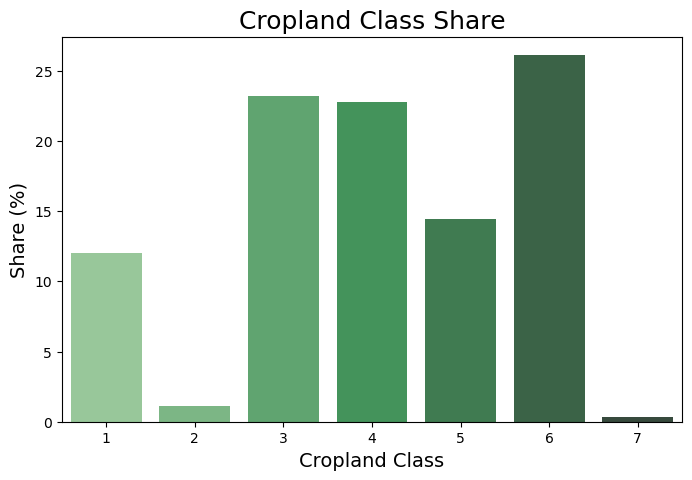

In [27]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(ax = ax, x= class_share.index , y = class_share, palette = 'Greens_d')
plt.title('Cropland Class Share', fontsize=18)
plt.xlabel('Cropland Class', fontsize=14)
plt.ylabel('Share (%)', fontsize=14)

### 5. Correlation Analysis



The correlation between features and the dependent variable, as well as intercorrelation among features, is essential for identifying potential collinearity issues.

The following code helps identify and sort highly intercorrelated features based on their correlation coefficients. A threshold of 0.95 is used to filter highly intercorrelated features.

In [28]:
highly_correlated_feature_pairs = []
highly_correlated_features_to_drop = []

correlation_matrix = dataset.corr().abs()
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
for row in range(upper_matrix.shape[0]):
    for column in range(upper_matrix.shape[1]):
        if upper_matrix.iloc[row, column] > 0.95:
            highly_correlated_feature_pairs.append([row, column, upper_matrix.iloc[row, column]])
            
print(f'Number of highly intercorrelated feature pairs: {len(highly_correlated_feature_pairs)}')

Number of highly intercorrelated feature pairs: 117


In [29]:
highly_correlated_feature_pairs = pd.DataFrame(highly_correlated_feature_pairs).sort_values(by=[2], ascending=False)
highly_correlated_feature_pairs.columns = ['feature_1', 'feature_2', 'correl']
highly_correlated_feature_pairs.head()

,feature_1,feature_2,correl
4,2,39,1.0
38,51,88,1.0
109,151,153,1.0
45,54,86,1.0
8,5,37,1.0


In [30]:
highly_correlated_features_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.95)]
dataset = dataset.drop(dataset[highly_correlated_features_to_drop], axis=1)

In [31]:
dataset.head()
dataset.shape

(325834, 103)

In [32]:
nr_features = dataset.shape[1] -1
print(f'Optimized number of features: {nr_features}')


Optimized number of features: 102


After dropping highly correlated features, the number of features was substantially reduced from 174 down to 102, marking a 41.4% decrease. This dimensionality reduction not only helps in mitigating collinearity but also facilitates the creation of streamlined models and faster learning with lower processing and memory requirements.

A final correlation map, including the dependent variable ('label')

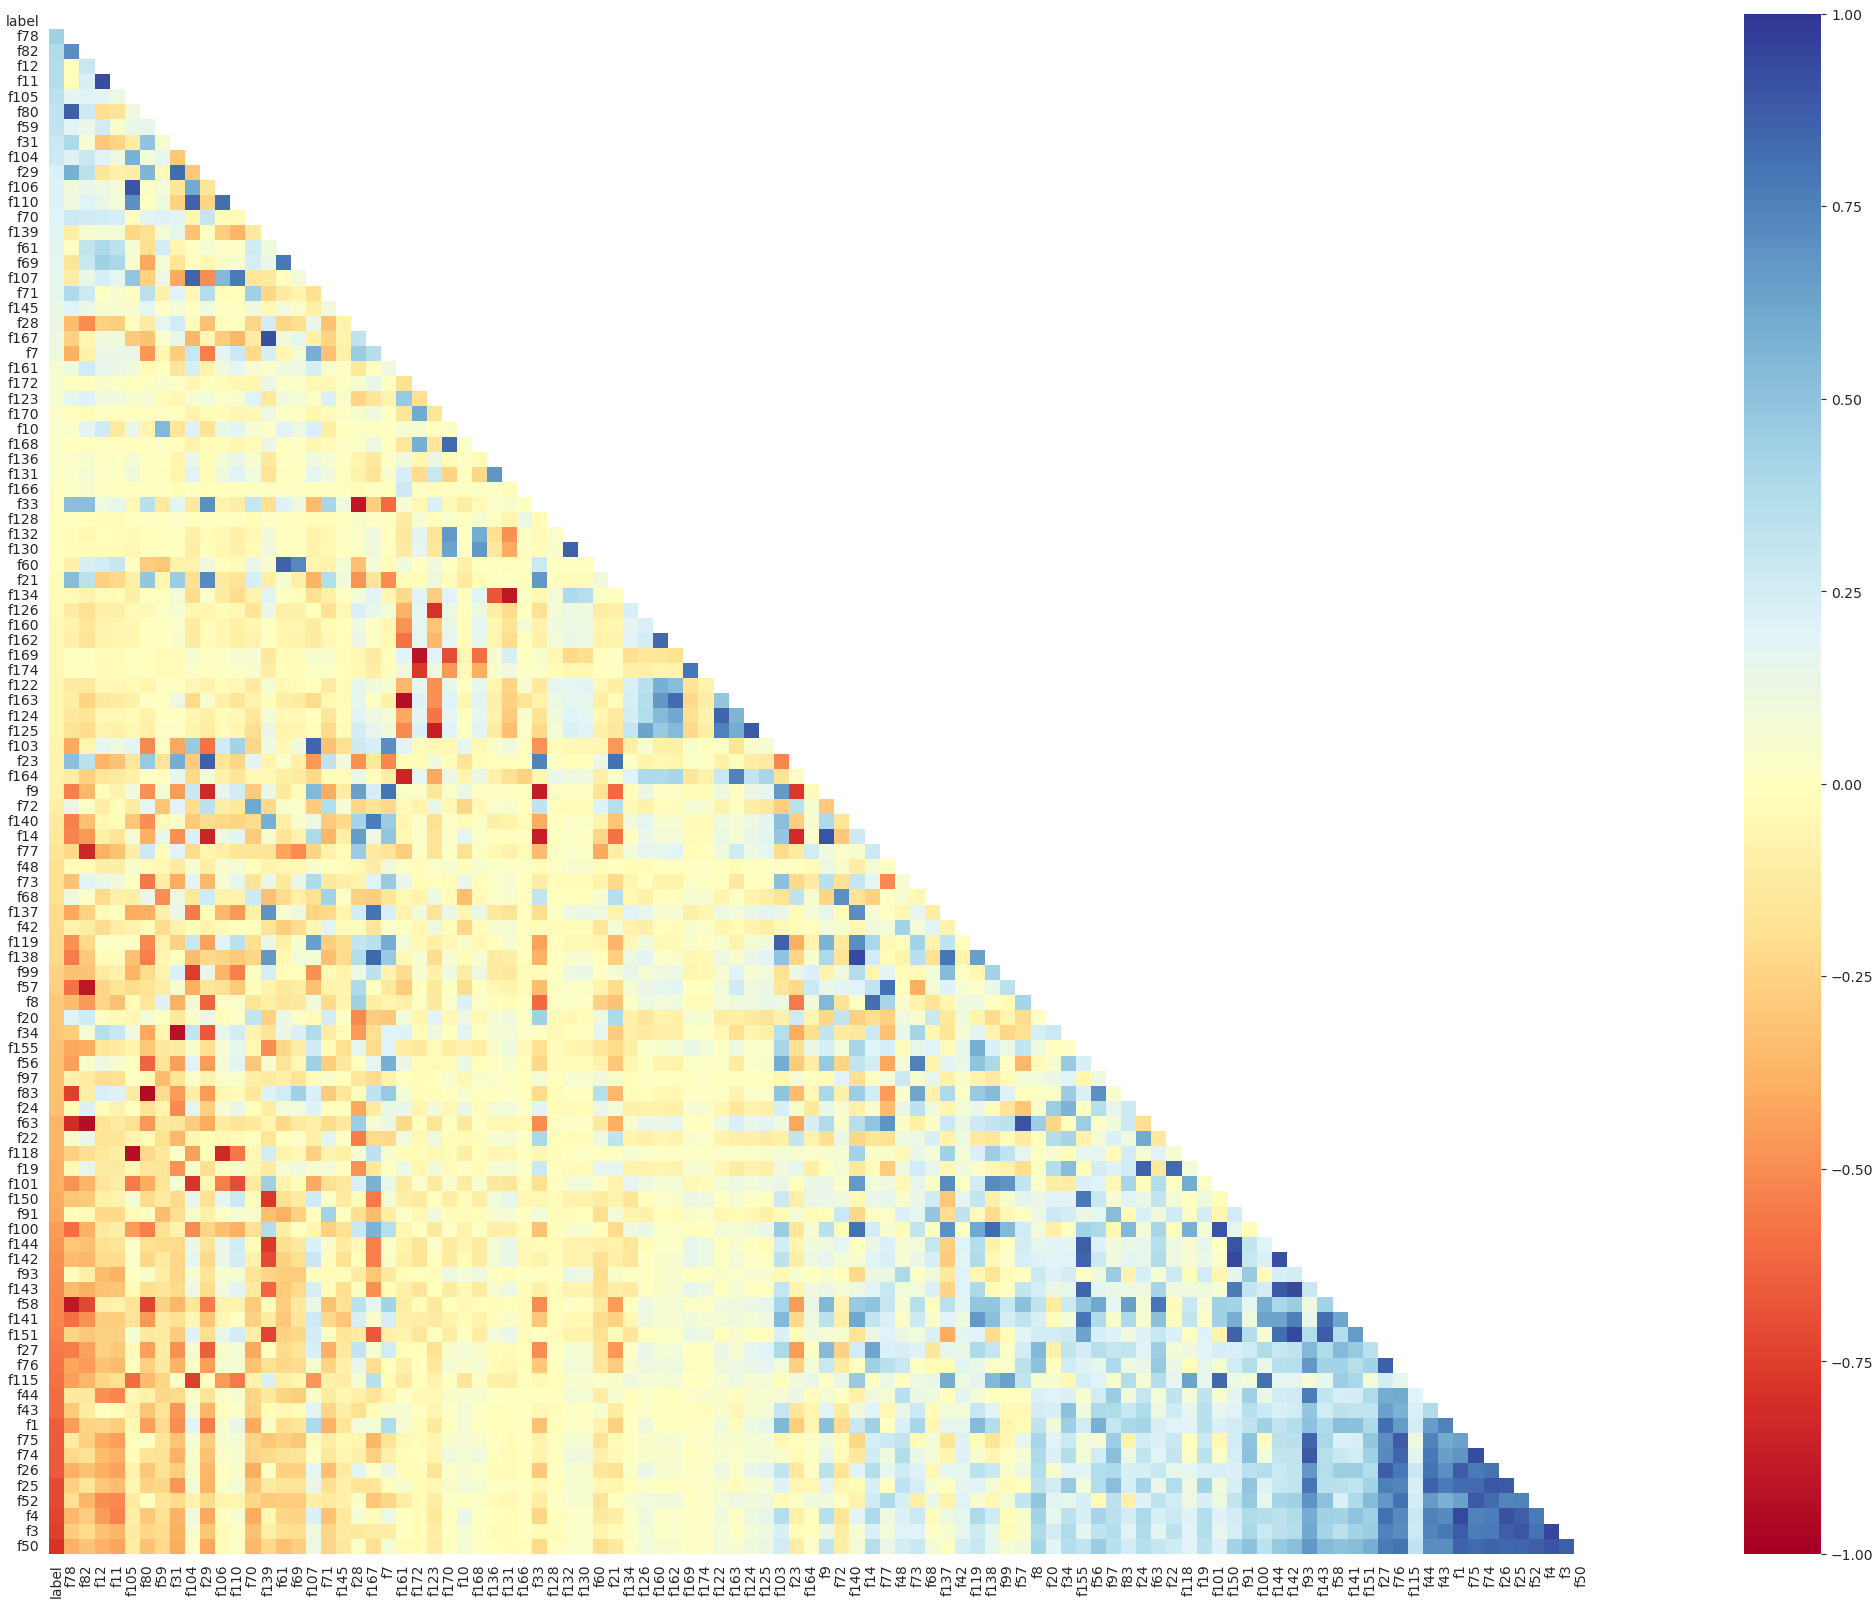

In [34]:
correlation_map(dataset, 'label', nr_features)


##### Feature Assessment
Using the custom function 'assessment', we plot feature distribution patterns and their relationship with the 'label' dependent variable. This is done for the 10 features most correlated with the dependent variable 'label', providing a preliminary understanding of data behavior.

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


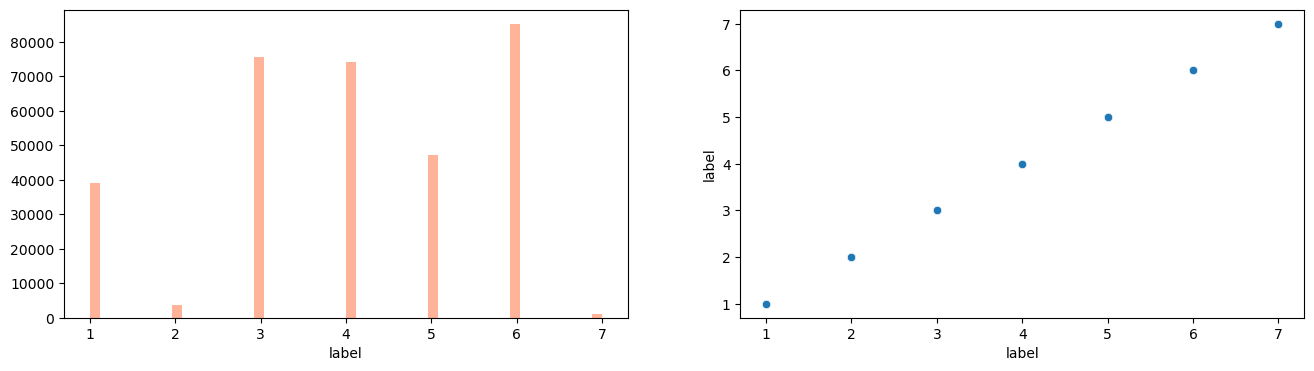

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


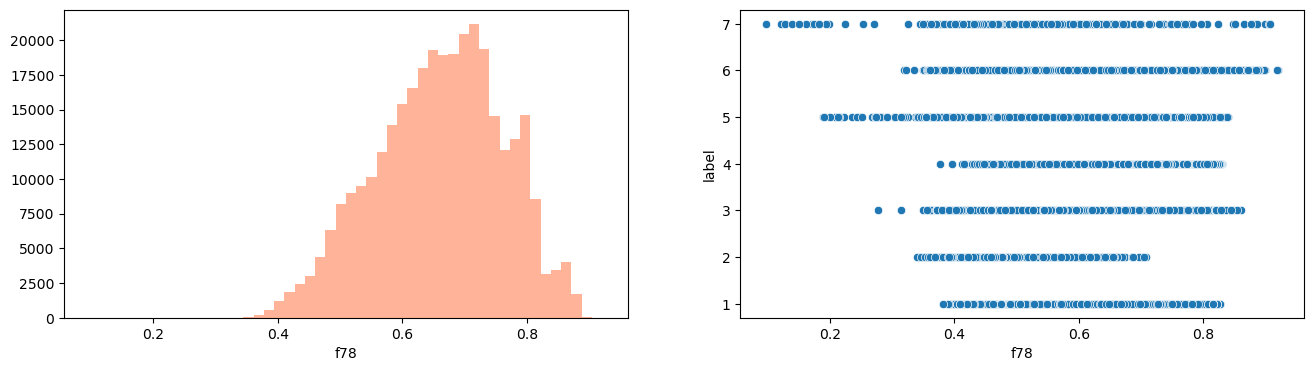

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


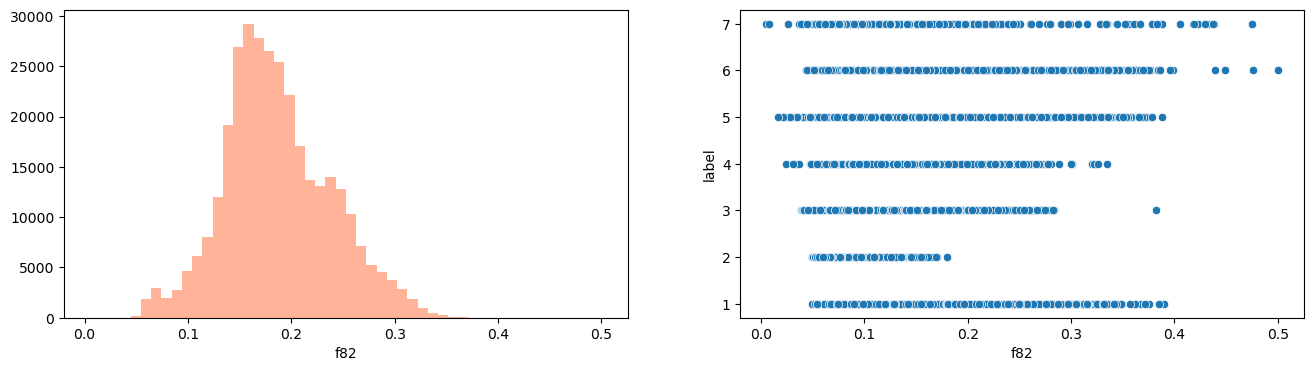

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


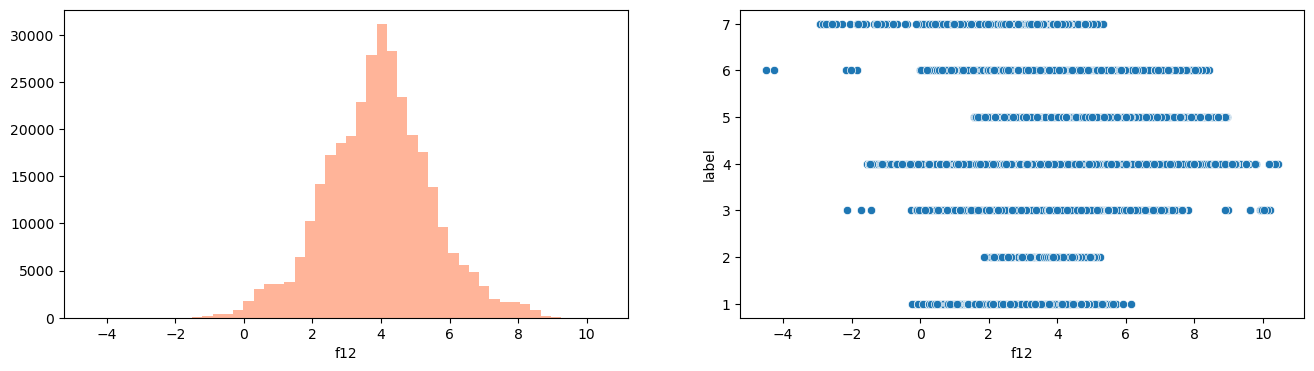

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


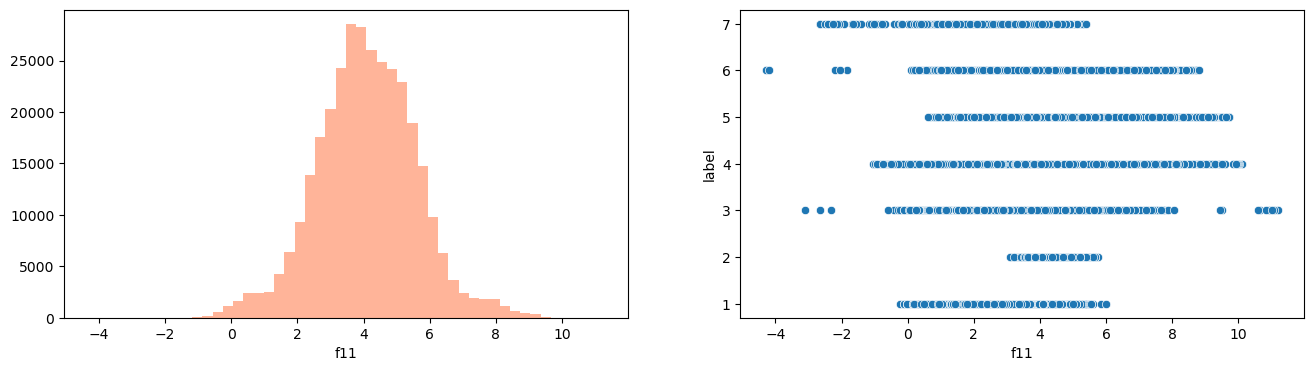

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


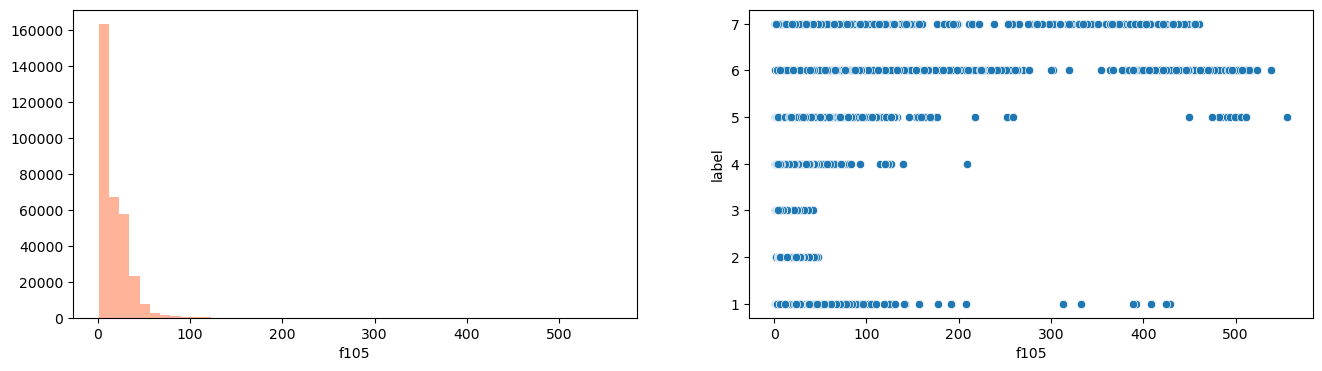

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


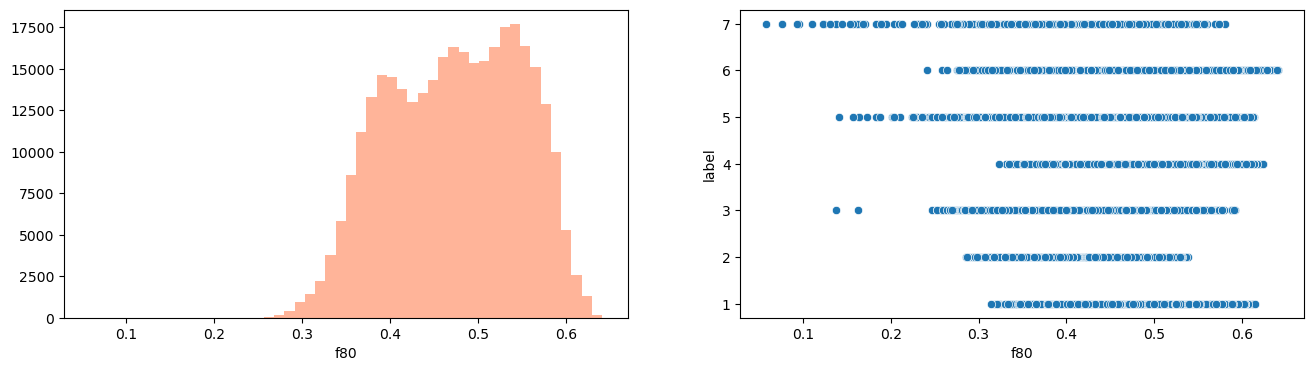

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


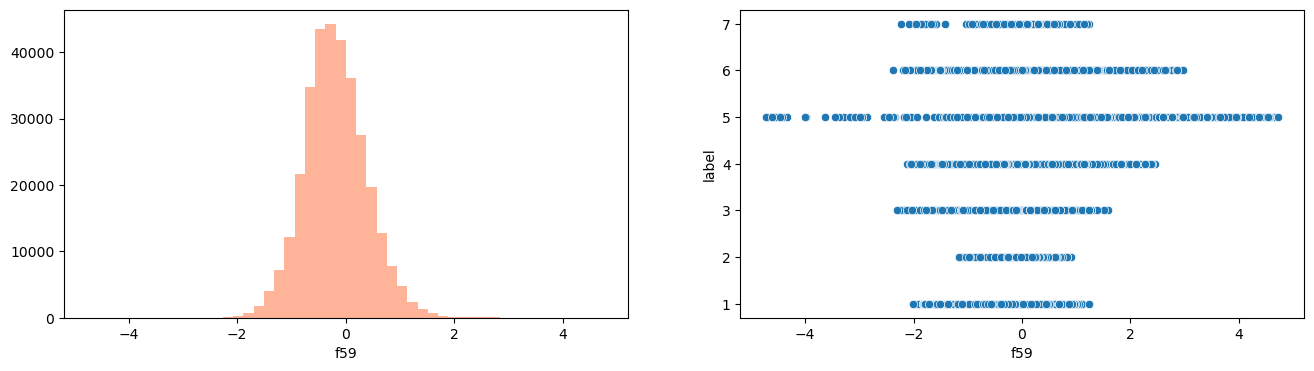

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


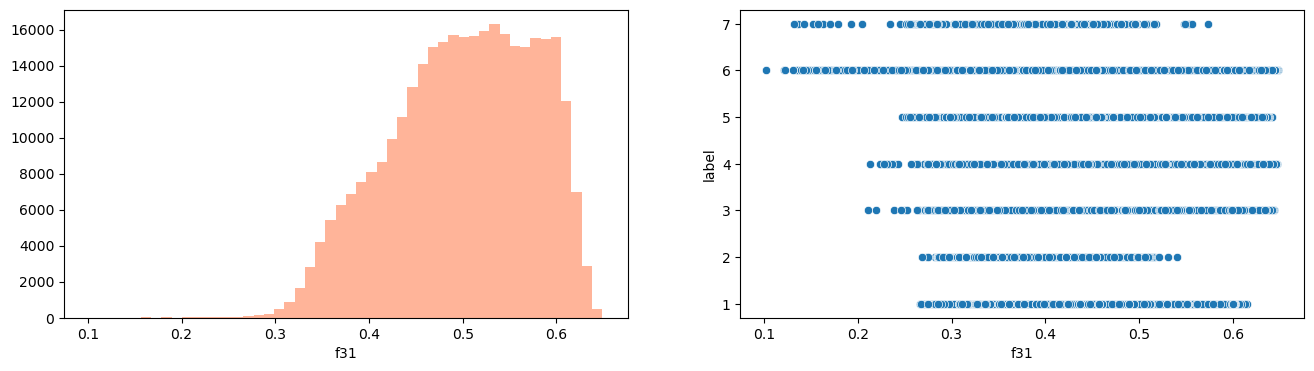

C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\531517100.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')


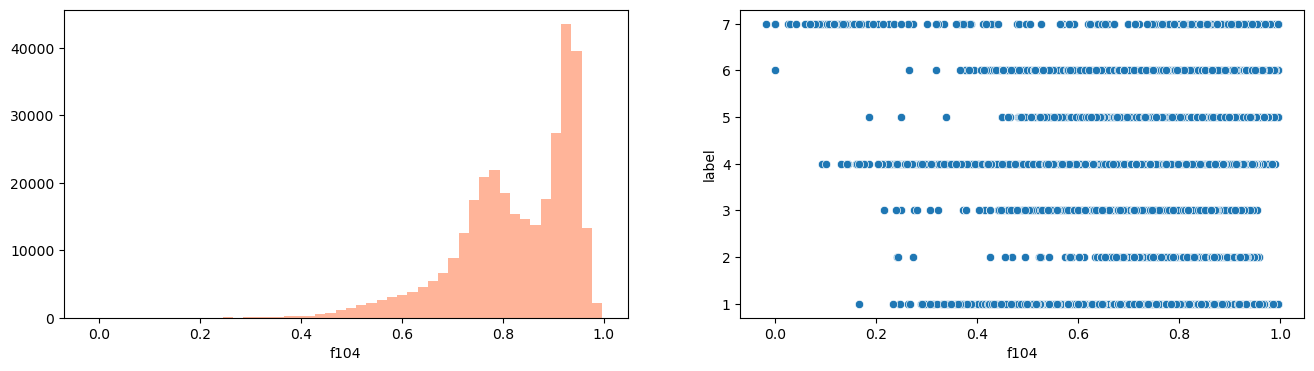

In [38]:
most_correlated_features = dataset.corr().nlargest(10,'label')['label'].index
for column in most_correlated_features:
    assessment(dataset, 'label', column, -1)

The analysis shows that some variables are indeed skewed. However, no transformation will be performed a priori. This decision may be revisited later in light of the overall performance of trained classifiers.



### Segregating Train and Test Sets
After feature engineering and preprocessing, the dataset now comprises 325,834 observations with one column for labels (integers ranging from 1 to 7) and 102 columns for features. To accommodate both classical (random forests) and deep (neural networks) machine learning models, two different sets of tensors are constructed.

For the random forest classification, the original labels are preserved and stored in a unidimensional array.

For the neural network classification, the label column is one-hot encoded using Pandas' get_dummies method. This results in labels represented as arrays with seven binary elements, each corresponding to a specific crop class. This encoding allows for class identification based on the array element with the highest predicted value.


##### Splitting Data into Training and Testing Sets

The unique features tensor and the two label tensors are divided into training and testing sets. The training set will contain 80% of the observations, while the testing set will hold the remaining 20%. These proportions were arbitrarily chosen by the author.

In [39]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0:1]


In [40]:
train_size = round(0.8 * len(X))

In [41]:
X_train = X.iloc[:train_size, :].values
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:,:].values
y_test = y.iloc[train_size:]

In [42]:
class_count = pd.Series(y_test.label.value_counts()).sort_index()
print('Class count - Test labels\n')
for i in range(0,7):
    print(f'Class {class_count.index[i]}: {class_count.iloc[i]}')
    

Class count - Test labels

Class 1: 7722
Class 2: 724
Class 3: 15250
Class 4: 14754
Class 5: 9462
Class 6: 17025
Class 7: 230


In [43]:
#Random Forrest
# pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

y_train_rf = y_train.label.values
y_test_rf = y_test.label.values

y_train_ann = pd.get_dummies(y_train.label).values
y_test_ann = pd.get_dummies(y_test.label).values


#### Feature Scaling
Scaling is performed to ensure that features are on a similar scale, which can benefit the performance and stability of machine learning algorithms. By applying the same scaling transformation to both the training and testing feature sets, the models trained on the scaled data can generalize better to unseen data.

In [44]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Machine Learning


### Random Forest

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)


A random forest-based classifier will be trained and tested to validate previous research findings. The classifier will be implemented using scikit-learn's RandomForestClassifier, utilizing default parameters with a few exceptions.

The RandomForestClassifier parameters and their default values are as follows:


'n_estimators': Number of trees in the forest (default 10).

'max_depth': Maximum tree depth (default None). If 'None', nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split.

'min_samples_split': Minimum number of samples required to split an internal node (default 2).

'min_samples_leaf': Minimum number of samples in newly created leaves (default 1).

'n_jobs': Number of jobs to run in parallel for both fitting and predicting (default 1). If -1, the number of jobs is set to the number of cores.

No parameter optimization will be performed initially, but this decision may be revisited based on performance metrics achieved during testing.


#### Model Fitting with Random Forest Classifier
The random forest classifier will be instantiated with n_estimators = 100 (i.e., comprising 100 decision trees) and n_jobs = 4 to utilize 4 processing cores.

The choice of 100 trees was made to approximate the number of features (102) for the initial model. However, for more robust optimization, it's recommended to explore relevant hyperparameters using techniques like validation curves. Readers are encouraged to experiment further.

In [46]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, n_jobs=4)

random_forest_classifier.fit(X_train, y_train_rf)

RandomForestClassifier(n_jobs=4)

After fitting the model to the training set, predictions are generated for the testing set. Each prediction corresponds to one particular crop class, represented by scalars ranging from 1 to 7.








In [47]:
y_pred_rf = random_forest_classifier.predict(X_test)

In [48]:
print(f'Predicted class: {y_pred_rf[0]}')
print(f'Actual class: {y_test_rf[0]}')

Predicted class: 3
Actual class: 3


#### Deep Learning (Artificial Neural Network)

The artificial neural network (ANN) architecture consists of a sequential structure with one input layer (102 input nodes), three hidden layers (204, 204, and 102 nodes, respectively), and one seven-node output layer.

For the hidden layers, 'relu' is chosen as the activation function, as the features are standardized real numbers. Since this is a multiclass classification task, 'softmax' is selected as the activation function for the output layer.

The 'Adam' optimizer is chosen, and its parameters are adjusted to provide flexibility, especially with the learning rate. For the loss function, 'categorical_crossentropy' is used due to the multiclass nature of the problem. Finally, the metric used for assessing fitting performance is 'accuracy'.

In [52]:
from IPython.display import Image
Image(url="https://i.imgur.com/XcKIjmy.png")



In [55]:
!pip install tensorflow
from tensorflow.keras.models import Sequential


Traceback (most recent call last):
  File "C:\Users\abudh\anaconda3\Scripts\pip-script.py", line 9, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\cli\main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\commands\__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._boots

ModuleNotFoundError: No module named 'tensorflow'

In [56]:
# ANN
ann_classifier = Sequential()

# Input layer and first dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu', input_dim = 102))
ann_classifier.add(Dropout(0.1))

# Second dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Third dense layer
ann_classifier.add(Dense(units = 102, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Output layer
ann_classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

# Model compilation

optim = Adam(learning_rate=0.0005)

ann_classifier.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

NameError: name 'Sequential' is not defined

## 7. Classification Performance


In classification problems, evaluating the model's performance involves various metrics and techniques. Along with traditional statistical performance metrics, confusion matrices offer a visual and quantitative assessment of the model's overall and per-class performance.

Random Forest Model

The Random Forest model's performance is evaluated using statistical metrics and a confusion matrix.

In [57]:
rf_cm = np.zeros((7,7))

In [58]:
rf_pred_correct = 0
rf_pred_incorrect = 0
for i in range(len(y_test)):
    rf_index_test = y_test_rf[i] - 1
    rf_index_pred = y_pred_rf[i] - 1
    rf_cm[rf_index_test][rf_index_pred] += 1
    if rf_index_test == rf_index_pred:
        rf_pred_correct += 1
    else:
        rf_pred_incorrect += 1

In [59]:
rf_cmatrix = pd.DataFrame(rf_cm.astype(int),
                          index = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'],
                          columns = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'])
rf_cmatrix

,Corn,Pea,Canola,Soy,Oat,Wheat,Broadleaf
Corn,7697,0,3,16,0,3,3
Pea,0,721,1,2,0,0,0
Canola,0,0,15235,5,4,6,0
Soy,4,0,8,14712,15,15,0
Oat,2,0,8,29,9361,60,2
Wheat,4,0,3,17,24,16974,3
Broadleaf,3,0,1,0,3,1,222


In [60]:
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_precision, rf_recall, rf_f_score, rf_support = precision_recall_fscore_support(y_test_rf, y_pred_rf, average='macro')
print(f'Accuracy: {rf_accuracy * 100:.2f} %')
print(f'Precision: {rf_precision * 100:.2f} %')
print(f'Recall: {rf_recall * 100:.2f} %')
print(f'F-Score: {rf_f_score * 100:.2f} %')

Accuracy: 99.62 %
Precision: 99.25 %
Recall: 99.15 %
F-Score: 99.20 %


In [61]:
print('Accuracy per class\n')
for i in range(len(rf_cmatrix)):
    class_accuracy = rf_cmatrix.iloc[i,i] / rf_cmatrix.sum(axis=0)[i]
    print(f'{rf_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Corn: 99.83 %
Pea: 100.00 %
Canola: 99.84 %
Soy: 99.53 %
Oat: 99.51 %
Wheat: 99.50 %
Broadleaf: 96.52 %


C:\Users\abudh\AppData\Local\Temp\ipykernel_13644\32578484.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_accuracy = rf_cmatrix.iloc[i,i] / rf_cmatrix.sum(axis=0)[i]


### 8. Discussion and Final Remarks


This study aimed to explore the effectiveness of remote cropland mapping using a combination of optical and radar-based information, employing both Random Forest and Neural Network classifiers.

### Results and Findings

The combination of optical and radar-based information led to highly accurate cropland mapping.
    
Proper data preprocessing, including the reduction of feature intercorrelation, proved essential for achieving robust results

The Random Forest classifier performed well, demonstrating that simpler models can provide accurate predictions when properly tuned.

More 'confusion' was observed between 'wheat' and 'oat' crop cultures, indicating the need for further investigation into distinguishing these classes.
    
Accuracy per crop class was generally high, with the exception of the 'broadleaf' class, which had relatively lower accuracies due to its small representation in the dataset.
    
### Conclusion
    
Proper preprocessing and model selection are crucial for accurate cropland mapping.

Random Forest can provide accurate predictions
    
Further experimentation, including hyperparameter optimization and cross-validation, could potentially improve model performance.


Future Directions

Investigate methods to distinguish between 'wheat' and 'oat' crop cultures to reduce confusion.

Experiment with different architectures and hyperparameters for both Random Forest models to further improve performance.

Explore techniques for handling skewed features and implementing cross-validation for more robust model evaluation.